<a href="https://colab.research.google.com/github/SamuelOnyangoOmondi/heart-disease-analysis/blob/main/Heart_Disease_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset into a DataFrame
url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=columns)

In [2]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

First few rows of the dataframe:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   
1   63    1   1       145   233    1        2      150      0      2.3      3   
2   67    1   4       160   286    0        2      108      1      1.5      2   
3   67    1   4       120   229    0        2      129      1      2.6      2   
4   37    1   3       130   250    0        0      187      0      3.5      3   

   ca  thal target  
0  ca  thal    num  
1   0     6      0  
2   3     3      2  
3   2     7      1  
4   0     3      0  


In [3]:
# Check the info of the dataset
print("\ndataset info:")
print(df.info())


dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       304 non-null    object
 1   sex       304 non-null    object
 2   cp        304 non-null    object
 3   trestbps  304 non-null    object
 4   chol      304 non-null    object
 5   fbs       304 non-null    object
 6   restecg   304 non-null    object
 7   thalach   304 non-null    object
 8   exang     304 non-null    object
 9   oldpeak   304 non-null    object
 10  slope     304 non-null    object
 11  ca        300 non-null    object
 12  thal      302 non-null    object
 13  target    304 non-null    object
dtypes: object(14)
memory usage: 33.4+ KB
None


In [4]:
# Statistical summary
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
        age  sex   cp trestbps chol  fbs restecg thalach exang oldpeak slope  \
count   304  304  304      304  304  304     304     304   304     304   304   
unique   42    3    5       51  153    3       4      92     3      41     4   
top      58    1    4      120  197    0       0     162     0       0     1   
freq     19  206  144       37    6  258     151      11   204      99   142   

         ca thal target  
count   300  302    304  
unique    5    4      6  
top       0    3      0  
freq    176  166    164  


In [5]:
# Checking data types
print(df.dtypes)

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target      object
dtype: object


In [6]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())
#Find the total number of missing values from the entire dataset
df.isnull().sum().sum()


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


6

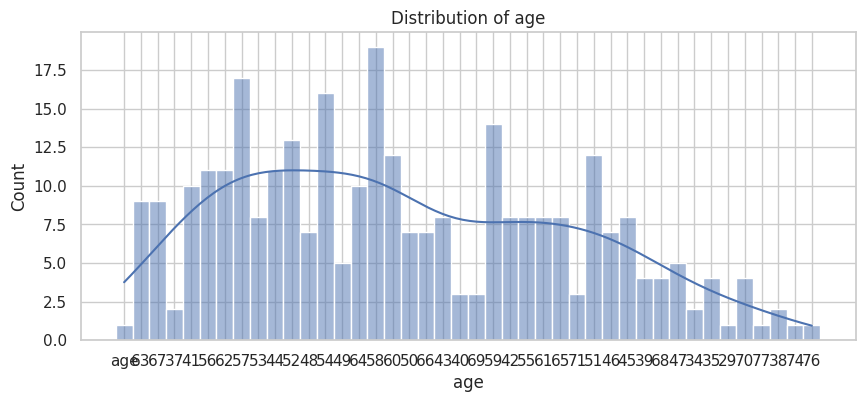

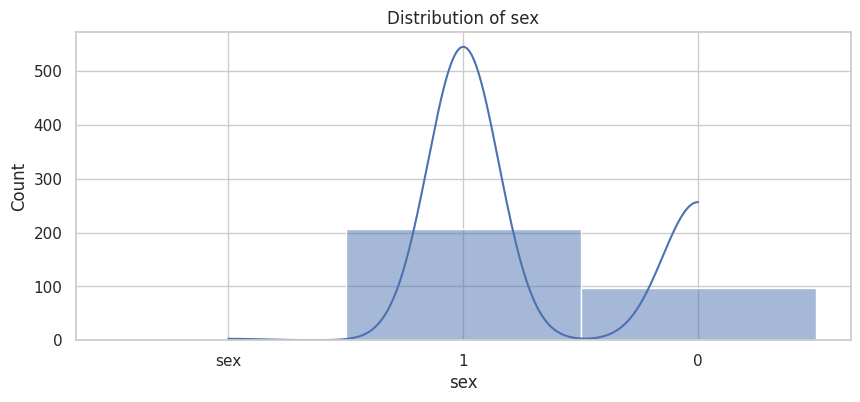

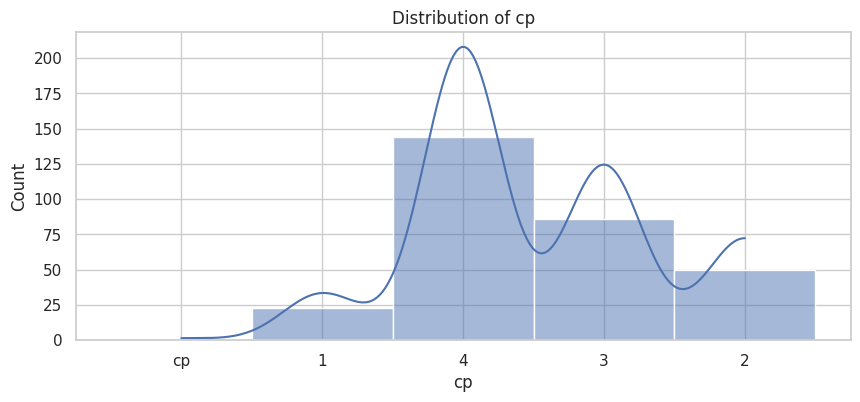

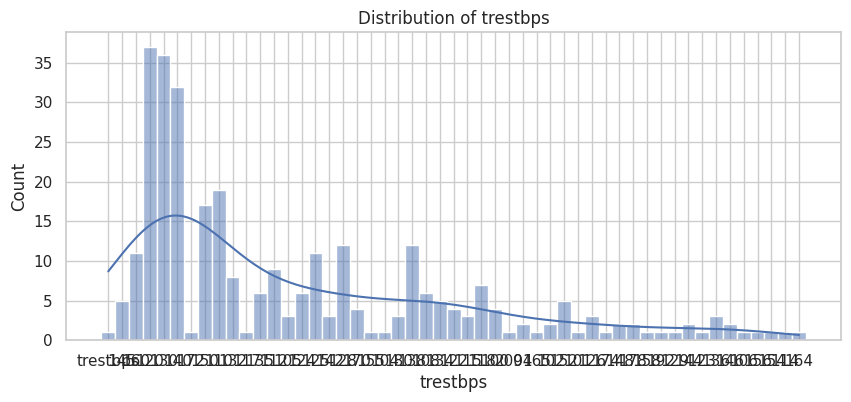

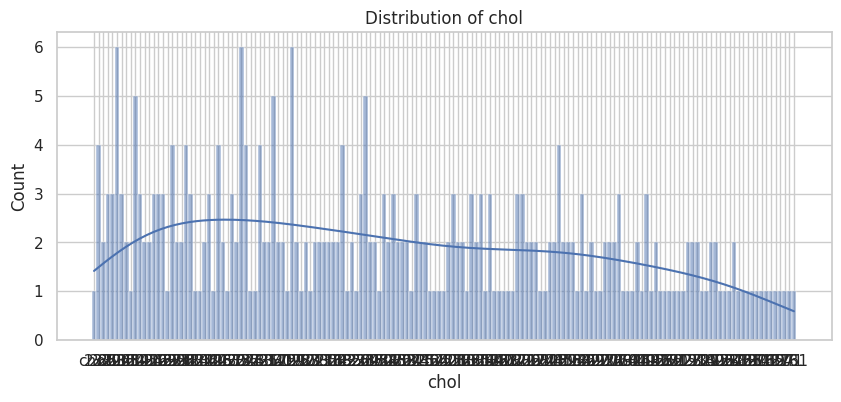

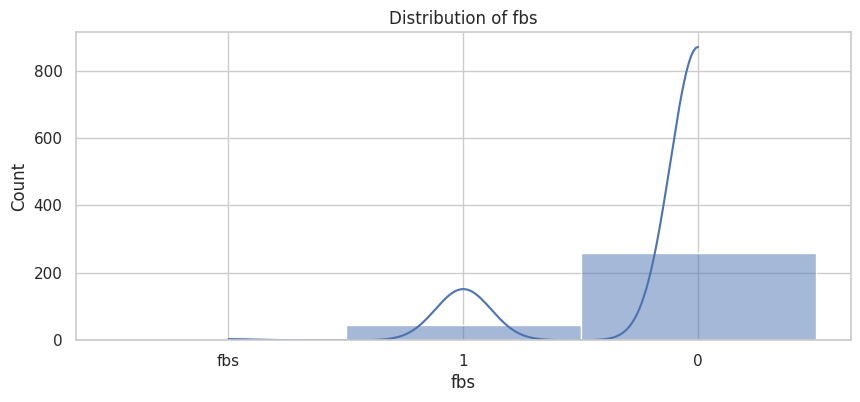

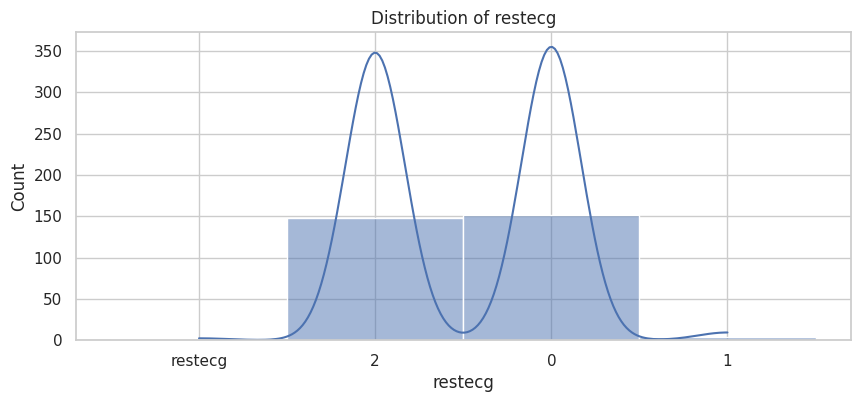

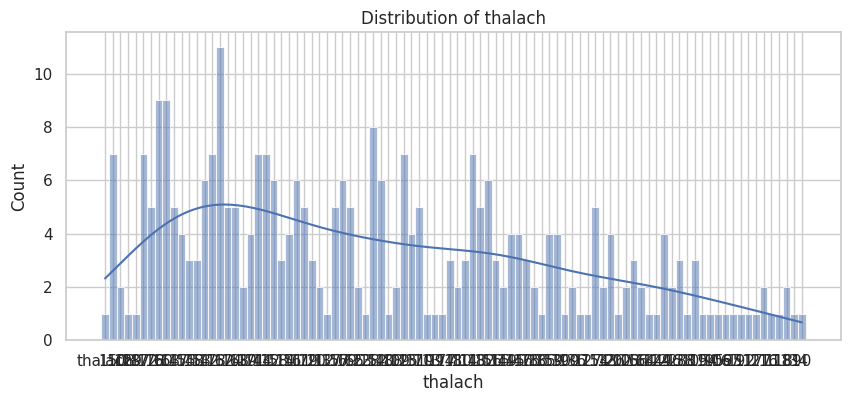

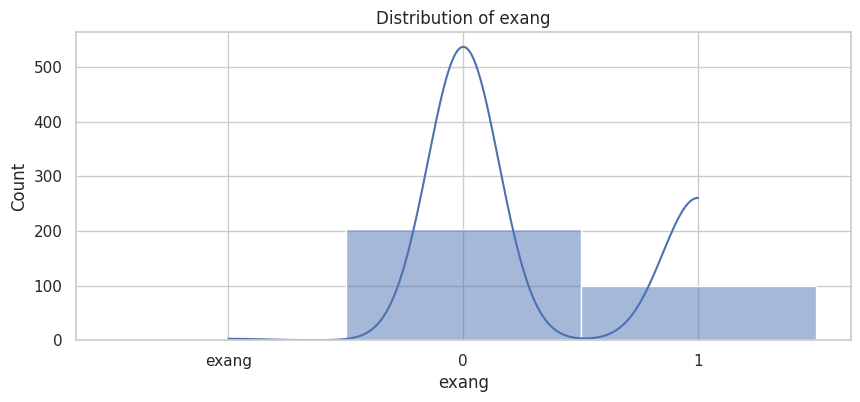

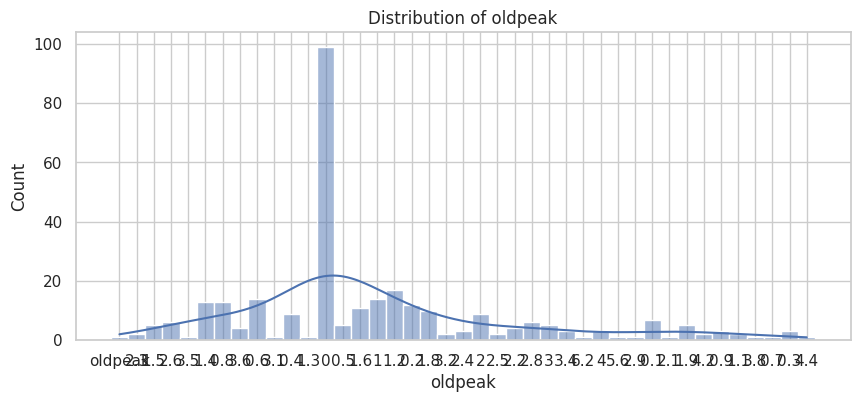

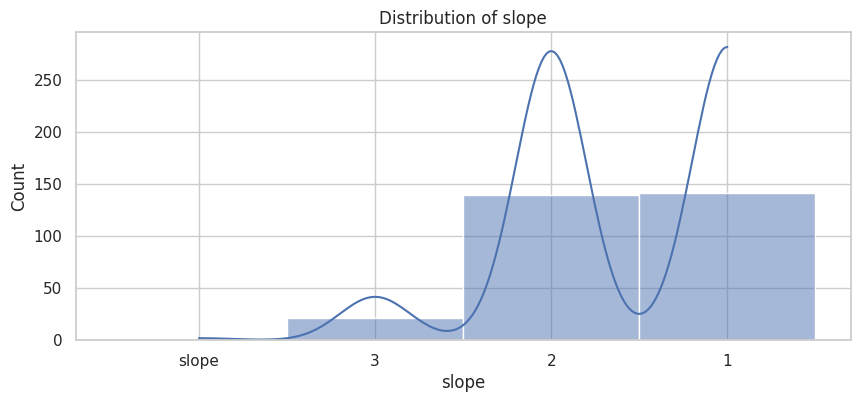

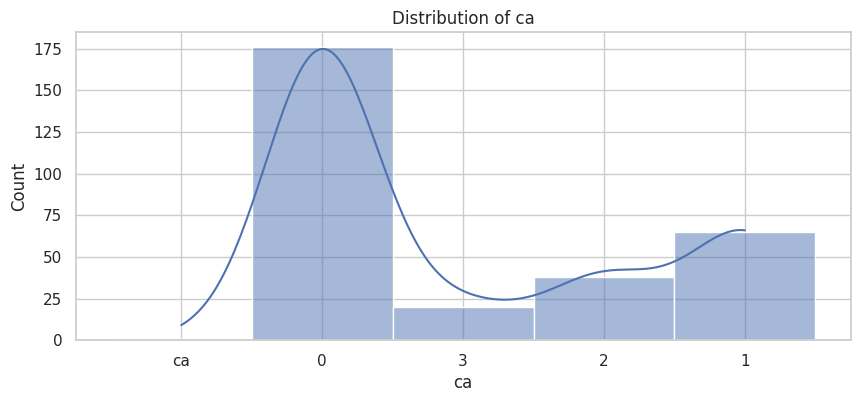

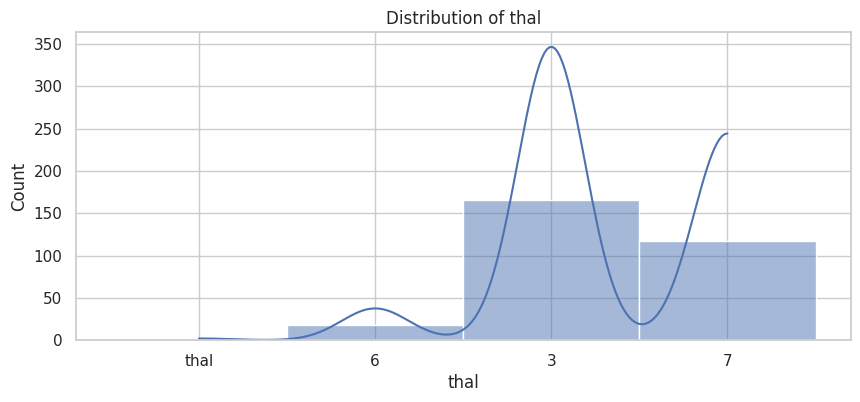

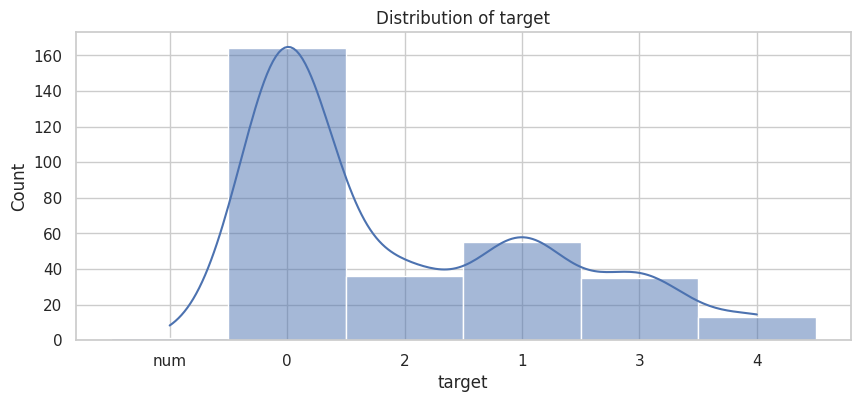

In [7]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of each feature
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object
age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          5
thal        3
target      1
dtype: int64


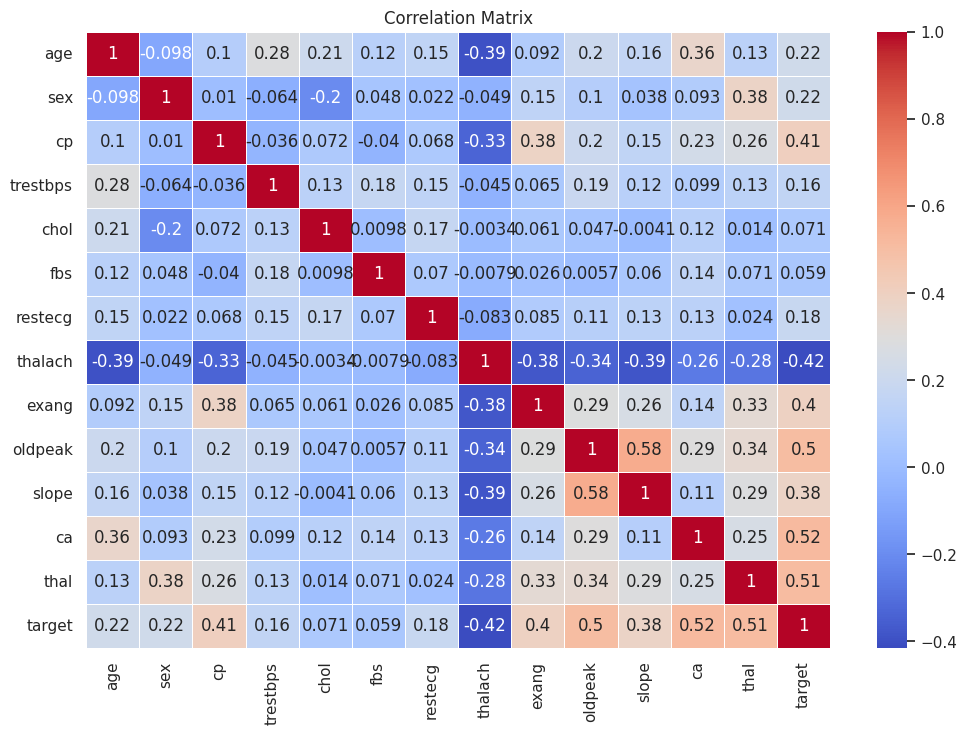

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert all columns that should be numeric but are object type. First, inspect the unique values:
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')  # 'coerce' will set errors to NaN
        except ValueError:
            print(f"Cannot convert {column} to numeric")

# Now check for any remaining non-numeric columns
print(df.dtypes)

# Check for NaN values in the dataframe
print(df.isna().sum())

# You might want to fill or drop NaN values
df = df.fillna(df.mean())  # Filling NaNs with mean values for simplicity; choose strategy based on context

# Re-try plotting the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


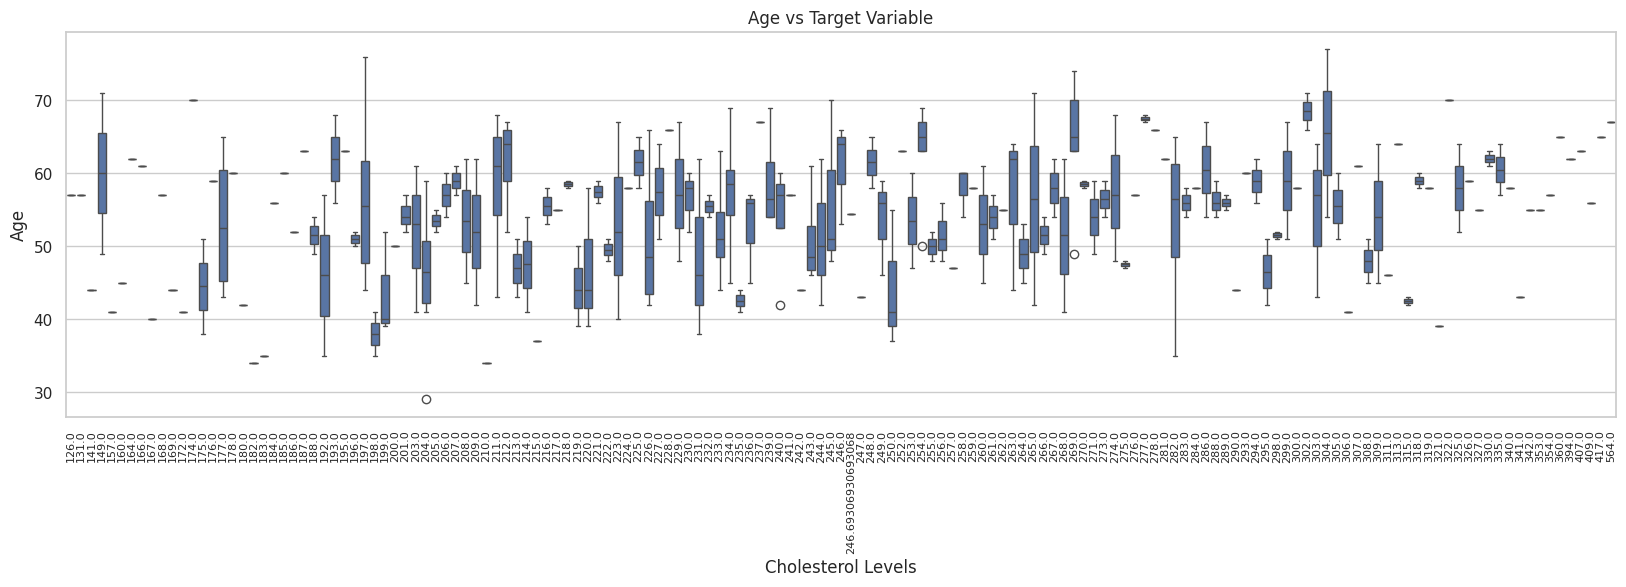

In [9]:
# Plot the relationship between age and target variable
plt.figure(figsize=(20, 5))
sns.boxplot(x='chol', y='age', data=df)
plt.title('Age vs Target Variable')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Age')
plt.xticks(rotation=90, fontsize=8)
plt.show()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


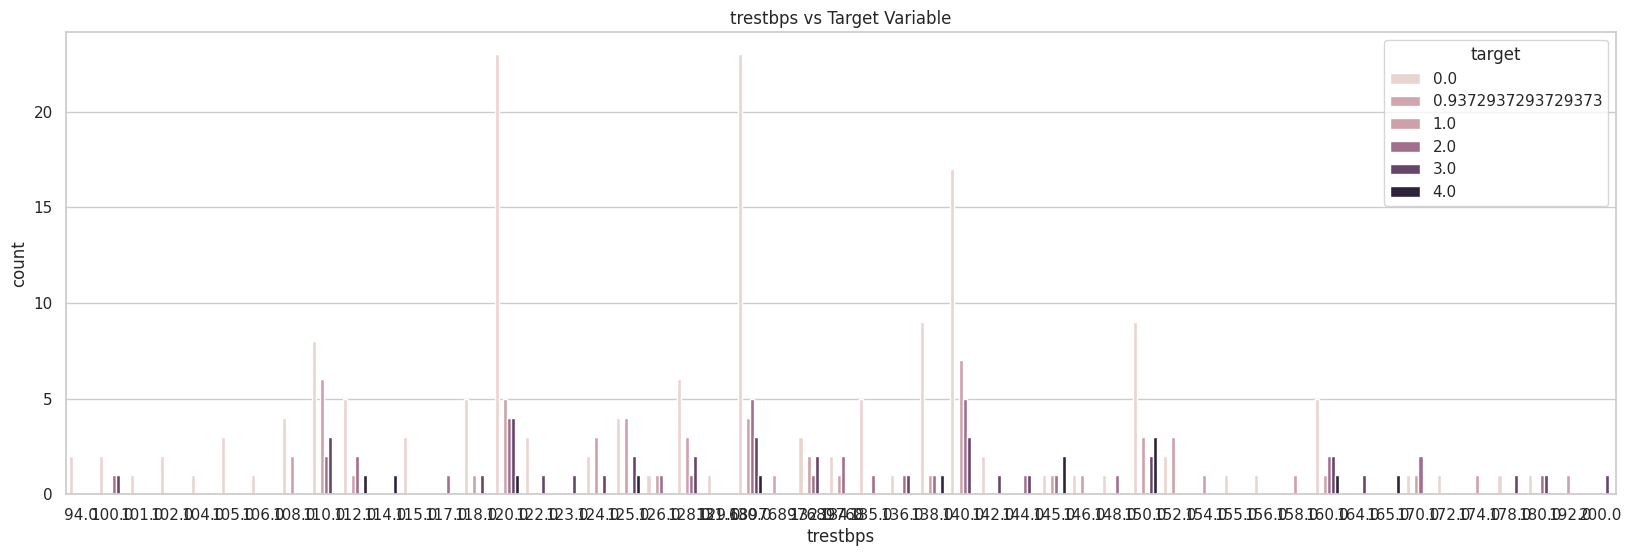

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df' is already loaded

# Print all column names to verify the correct one
print(df.columns)

# If 'num' is supposed to be 'target' or another column, correct it:
plt.figure(figsize=(20, 6))
sns.countplot(x='trestbps', hue='target', data=df)  # Replace 'num' with the correct column name
plt.title('trestbps vs Target Variable')
plt.show()


In [11]:
# Display the first few rows of the DataFrame to verify
print("First few rows of the dataset:")
print(df.head())

# Check for missing values before handling
missing_values_before = df.isnull().sum()
print("\nMissing values before handling:")
print(missing_values_before)

# Replace missing values in 'ca' and 'thal' columns with the median value
df['chol'].fillna(df['chol'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)

# Check for missing values after handling
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)

First few rows of the dataset:
         age       sex        cp    trestbps        chol       fbs   restecg  \
0  54.438944  0.679868  3.158416  131.689769  246.693069  0.148515  0.990099   
1  63.000000  1.000000  1.000000  145.000000  233.000000  1.000000  2.000000   
2  67.000000  1.000000  4.000000  160.000000  286.000000  0.000000  2.000000   
3  67.000000  1.000000  4.000000  120.000000  229.000000  0.000000  2.000000   
4  37.000000  1.000000  3.000000  130.000000  250.000000  0.000000  0.000000   

      thalach     exang   oldpeak    slope        ca      thal    target  
0  149.607261  0.326733  1.039604  1.60066  0.672241  4.734219  0.937294  
1  150.000000  0.000000  2.300000  3.00000  0.000000  6.000000  0.000000  
2  108.000000  1.000000  1.500000  2.00000  3.000000  3.000000  2.000000  
3  129.000000  1.000000  2.600000  2.00000  2.000000  7.000000  1.000000  
4  187.000000  0.000000  3.500000  3.00000  0.000000  3.000000  0.000000  

Missing values before handling:
age  

In [17]:
# Check unique values and their type in the target column
print("Unique values in 'target':", df['target'].unique())
print("Data type of 'target':", df['target'].dtype)


Unique values in 'target': [0.93729373 0.         2.         1.         3.         4.        ]
Data type of 'target': float64


In [18]:
# Convert target to integer if it is not already
df['target'] = df['target'].astype('int')
y = df['target']

# Confirm conversion
print("Unique values in 'target' after conversion:", df['target'].unique())
print("Data type of 'target' after conversion:", df['target'].dtype)


Unique values in 'target' after conversion: [0 2 1 3 4]
Data type of 'target' after conversion: int64


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data again to ensure the target is updated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.4918032786885246
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        29
           1       0.00      0.00      0.00        14
           2       0.29      0.25      0.27         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.24      0.21        61
weighted avg       0.35      0.49      0.40        61



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       144
           1       0.41      0.86      0.55        50
           2       1.00      0.03      0.06        35
           3       0.62      0.24      0.35        33
           4       0.33      0.08      0.13        12

    accuracy                           0.72       274
   macro avg       0.66      0.44      0.41       274
weighted avg       0.79      0.72      0.67       274


Confusion Matrix:
[[144   0   0   0   0]
 [  7  43   0   0   0]
 [  0  29   1   4   1]
 [  0  24   0   8   1]
 [  0  10   0   1   1]]


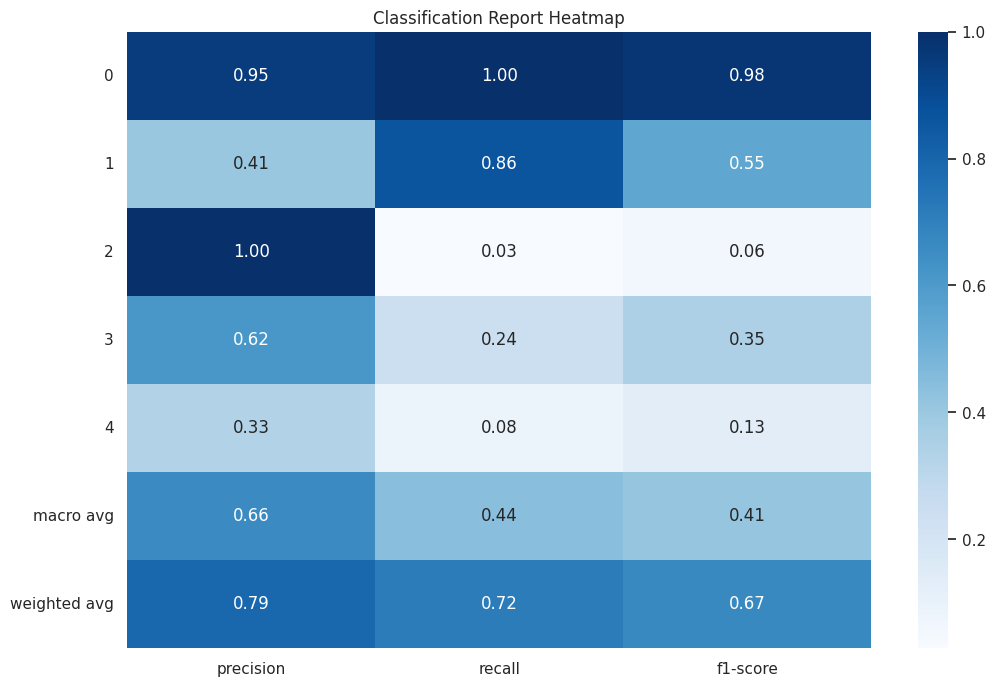

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Print all column names to verify the correct one for the target
print(df.columns)

# If 'num' is supposed to be 'target' or another column, correct it:
# Replace 'num' with the correct column name based on the printed columns
y = df['target']  # Assume 'target' is the correct column name

# Continue with your data cleaning and filling missing values
df['ca'].fillna(df['ca'].median(), inplace=True)
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)

# Define features and target
X = df.drop('chol', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Visualize the precision, recall, f1-score, and support as a heatmap
metrics = ['precision', 'recall', 'f1-score']
report_df = report_df.loc[report_df.index != 'accuracy']  # Remove the accuracy row

plt.figure(figsize=(12, 8))
sns.heatmap(report_df[metrics], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()


**GridSearchCV for hypertuning**

In [23]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for hypertuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hypertuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


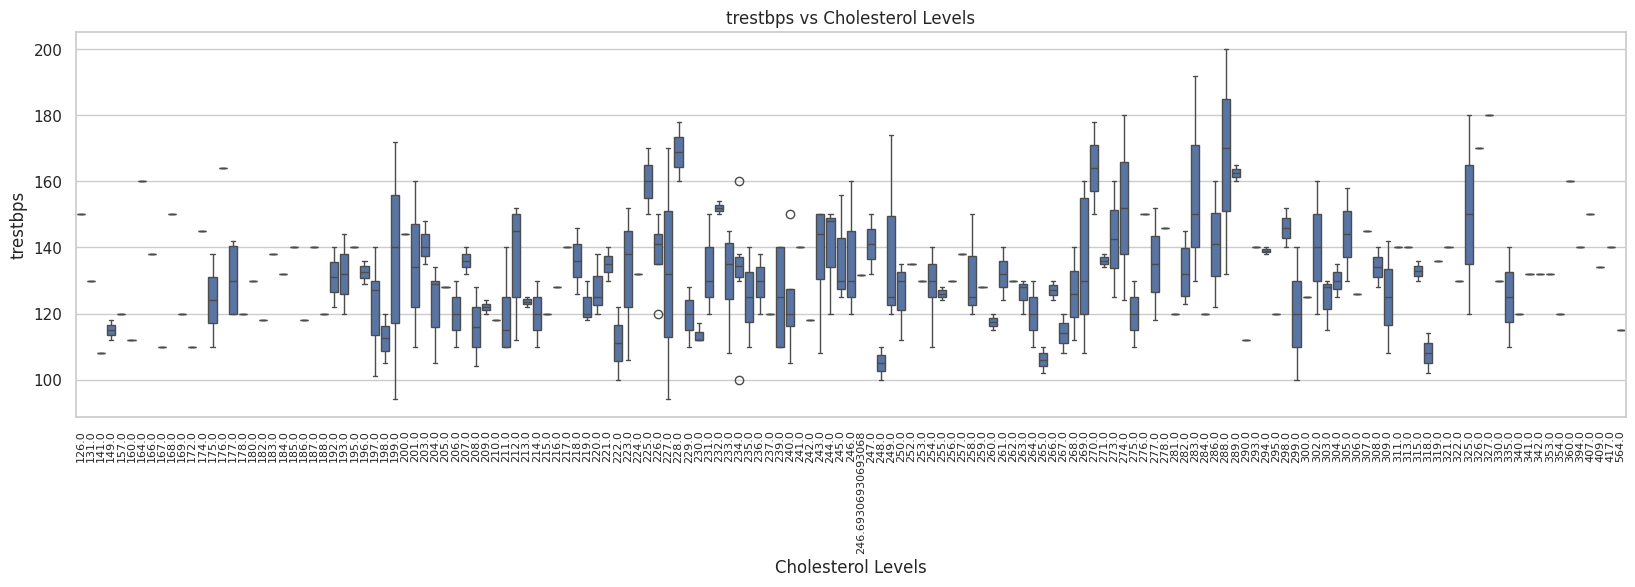

In [ ]:
# Plot the relationship between trestbps and cholesterol levels
plt.figure(figsize=(20, 5))
sns.boxplot(x='chol', y='trestbps', data=df)
plt.title('trestbps vs Cholesterol Levels')
plt.xlabel('Cholesterol Levels')
plt.ylabel('trestbps')
plt.xticks(rotation=90, fontsize=8)
plt.show()

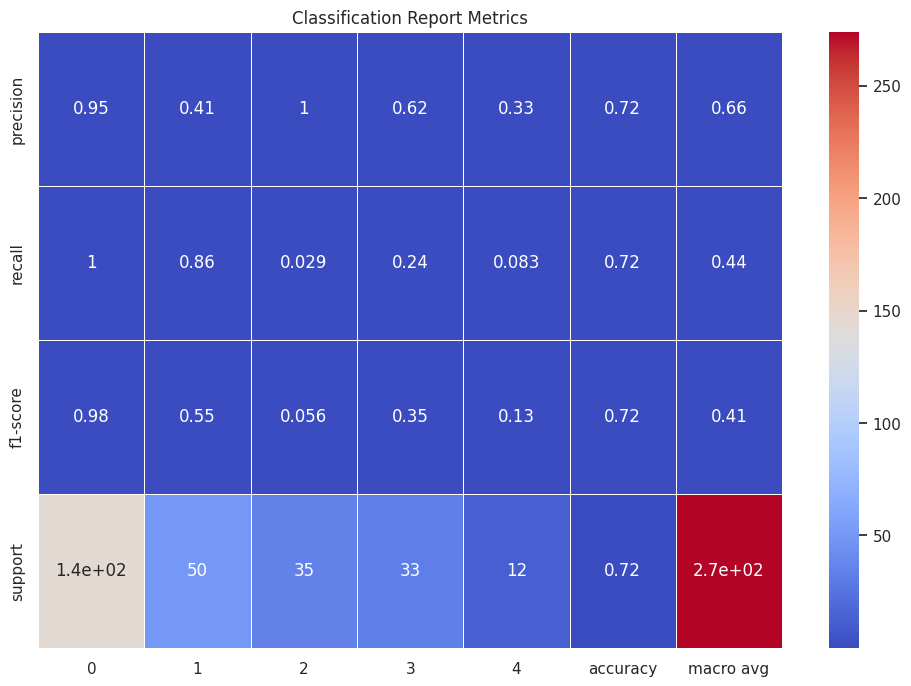

In [24]:
# Plot heatmap of precision, recall, f1-score, and support
plt.figure(figsize=(12, 8))
sns.heatmap(df_report[['precision', 'recall', 'f1-score', 'support']].iloc[:-1, :].T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Classification Report Metrics')
plt.show()

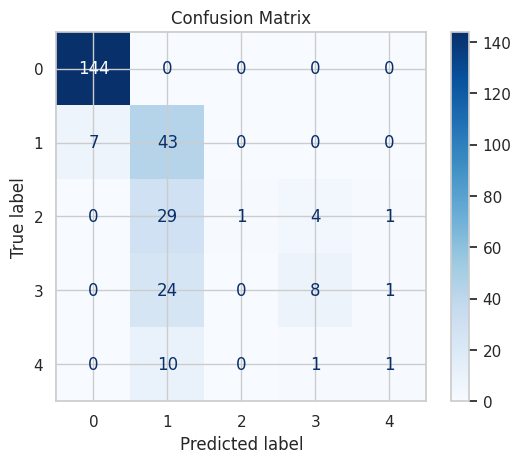

In [25]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Step 1: Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

In [27]:
print("Columns in df_encoded before dropping 'num':", df_encoded.columns)


Columns in df_encoded before dropping 'num': Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_0.6798679867986799', 'sex_1.0', 'cp_2.0', 'cp_3.0',
       'cp_3.1584158415841586', 'cp_4.0', 'fbs_0.1485148514851485', 'fbs_1.0',
       'restecg_0.9900990099009901', 'restecg_1.0', 'restecg_2.0',
       'exang_0.32673267326732675', 'exang_1.0', 'slope_1.6006600660066006',
       'slope_2.0', 'slope_3.0', 'thal_4.73421926910299', 'thal_6.0',
       'thal_7.0'],
      dtype='object')


In [28]:
# Check if 'num' is in df_encoded and drop it if present
if 'num' in df_encoded.columns:
    features = df_encoded.drop('num', axis=1)
else:
    print("'num' not found in df_encoded. Using df_encoded as is.")
    features = df_encoded.copy()

# Proceed with scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


'num' not found in df_encoded. Using df_encoded as is.


In [29]:
# Assuming the correct column name is identified or confirmed that 'num' should exist
# Let's say the correct column name is 'target' (if 'num' was a mistake)

features = df_encoded.drop('target', axis=1)  # Replace 'num' with the correct column name if different
features_scaled = scaler.fit_transform(features)

# Continue with your analysis or further data processing


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_encoded is already loaded somewhere in your code.
# Print columns to check if 'num' is a valid column
print("Columns available in df_encoded:", df_encoded.columns)

# Step 2: Scaling features
scaler = StandardScaler()

# Safely drop 'num' if it exists, otherwise use the DataFrame as is
if 'num' in df_encoded.columns:
    features = df_encoded.drop('num', axis=1)
else:
    print("Column 'num' not found. Using the full df_encoded DataFrame.")
    features = df_encoded

features_scaled = scaler.fit_transform(features)


Columns available in df_encoded: Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_0.6798679867986799', 'sex_1.0', 'cp_2.0', 'cp_3.0',
       'cp_3.1584158415841586', 'cp_4.0', 'fbs_0.1485148514851485', 'fbs_1.0',
       'restecg_0.9900990099009901', 'restecg_1.0', 'restecg_2.0',
       'exang_0.32673267326732675', 'exang_1.0', 'slope_1.6006600660066006',
       'slope_2.0', 'slope_3.0', 'thal_4.73421926910299', 'thal_6.0',
       'thal_7.0'],
      dtype='object')
Column 'num' not found. Using the full df_encoded DataFrame.


In [31]:
# Step 3: Clustering Algorithms

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)
kmeans_silhouette = silhouette_score(features_scaled, kmeans_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(features_scaled)
agg_silhouette = silhouette_score(features_scaled, agg_labels)

In [33]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)
dbscan_silhouette = silhouette_score(features_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

In [34]:
# Gaussian Mixture Models (GMMs)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(features_scaled)
gmm_silhouette = silhouette_score(features_scaled, gmm_labels)

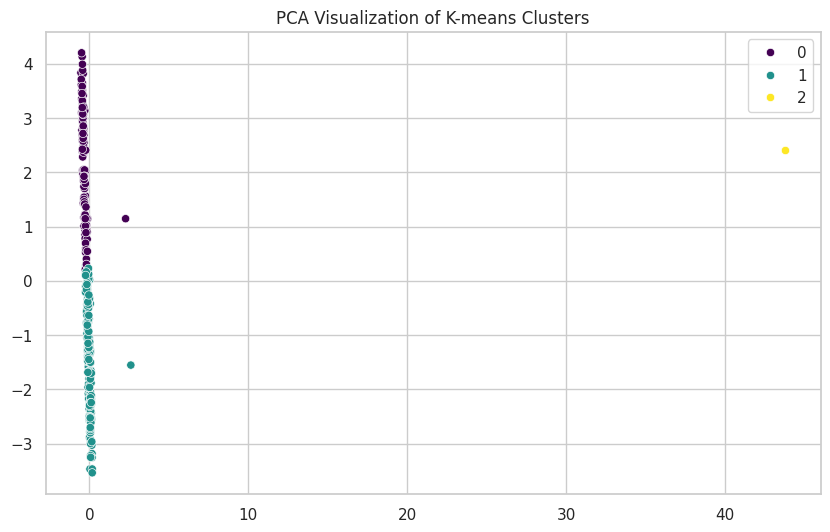

In [35]:
# Visualizing Clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('PCA Visualization of K-means Clusters')
plt.show()

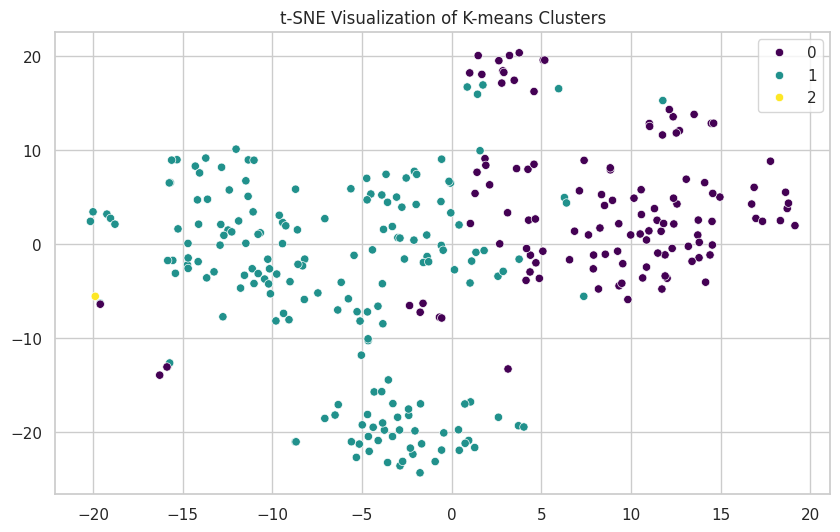

In [36]:
# Visualizing Clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('t-SNE Visualization of K-means Clusters')
plt.show()

In [37]:
# Evaluate clustering performance
kmeans_db = davies_bouldin_score(features_scaled, kmeans_labels)
agg_db = davies_bouldin_score(features_scaled, agg_labels)
dbscan_db = davies_bouldin_score(features_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
gmm_db = davies_bouldin_score(features_scaled, gmm_labels)

In [38]:
results = {
    'Method': ['K-means', 'Hierarchical', 'DBSCAN', 'GMM'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette, dbscan_silhouette, gmm_silhouette],
    'Davies-Bouldin Index': [kmeans_db, agg_db, dbscan_db, gmm_db]
}

results_df = pd.DataFrame(results)
print(results_df)

         Method  Silhouette Score  Davies-Bouldin Index
0       K-means          0.168116              1.495440
1  Hierarchical          0.157692              1.714069
2        DBSCAN         -1.000000             -1.000000
3           GMM          0.126924              2.329012


In [39]:
# Identify outliers using the IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply outlier detection to relevant columns
outlier_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in outlier_columns:
    outliers = identify_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

# remove outliers
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Shape of dataset after outlier removal:", df.shape)

Number of outliers in age: 0
Number of outliers in trestbps: 9
Number of outliers in chol: 5
Number of outliers in thalach: 1
Number of outliers in oldpeak: 5
Shape of dataset after outlier removal: (285, 14)


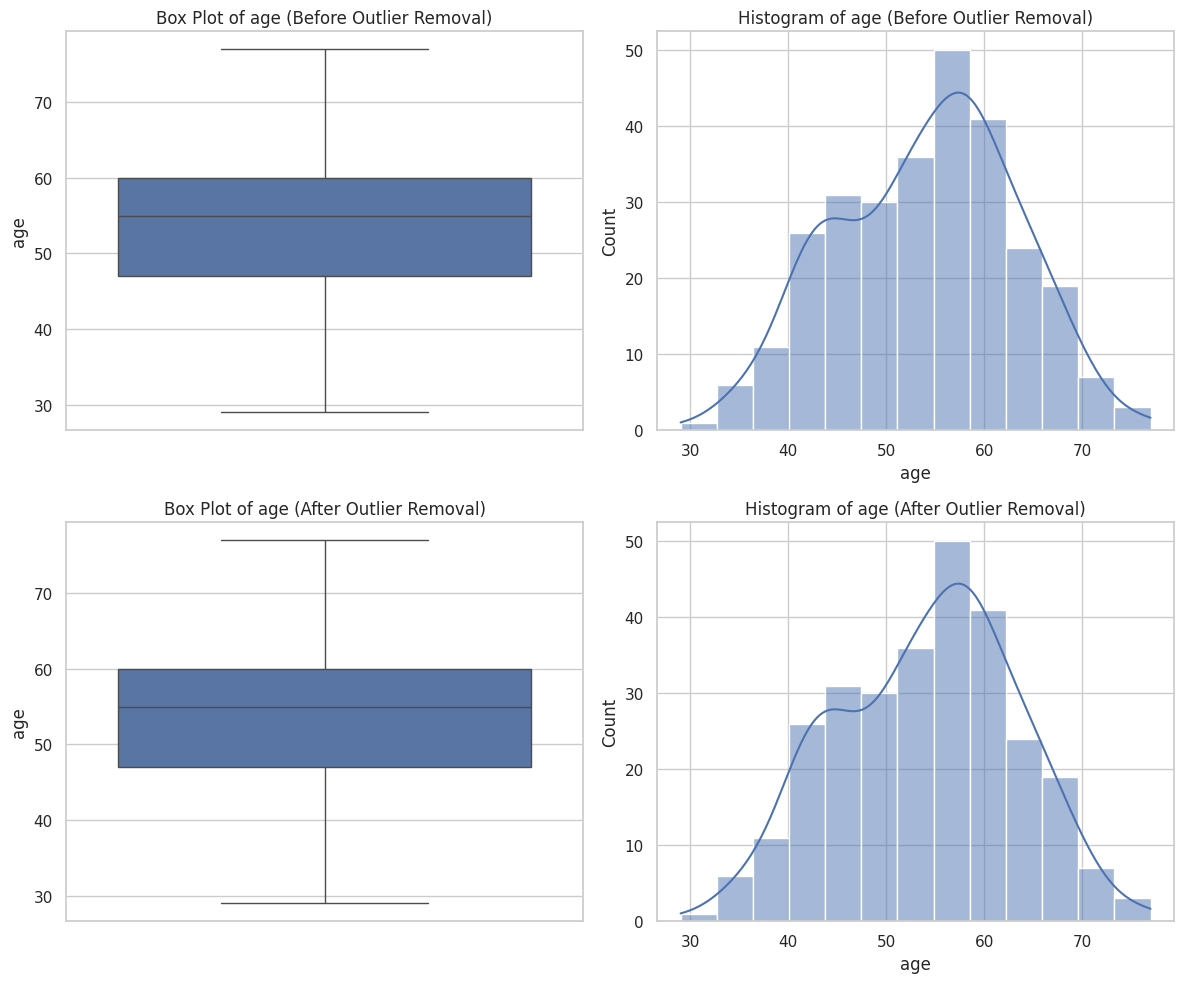

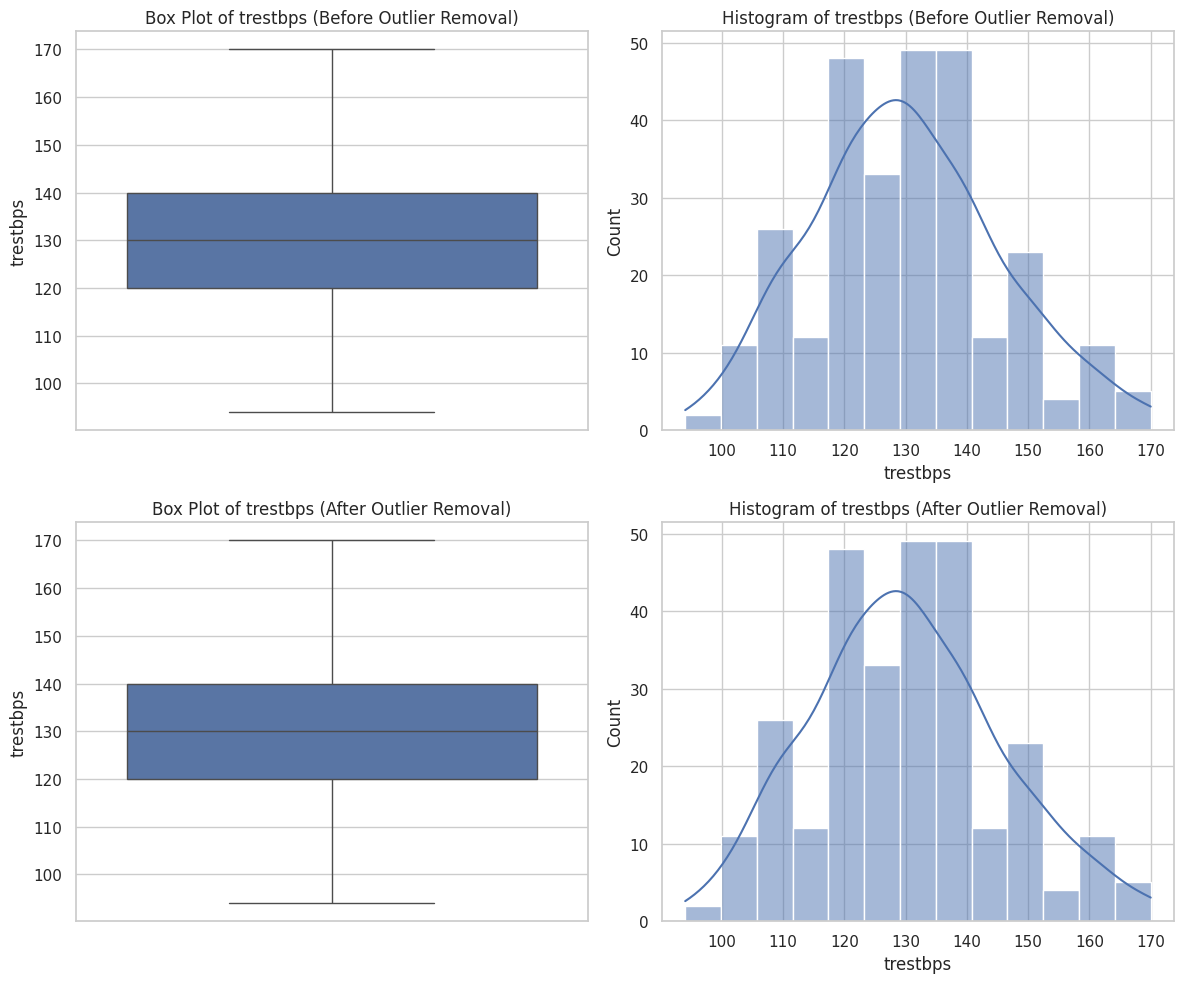

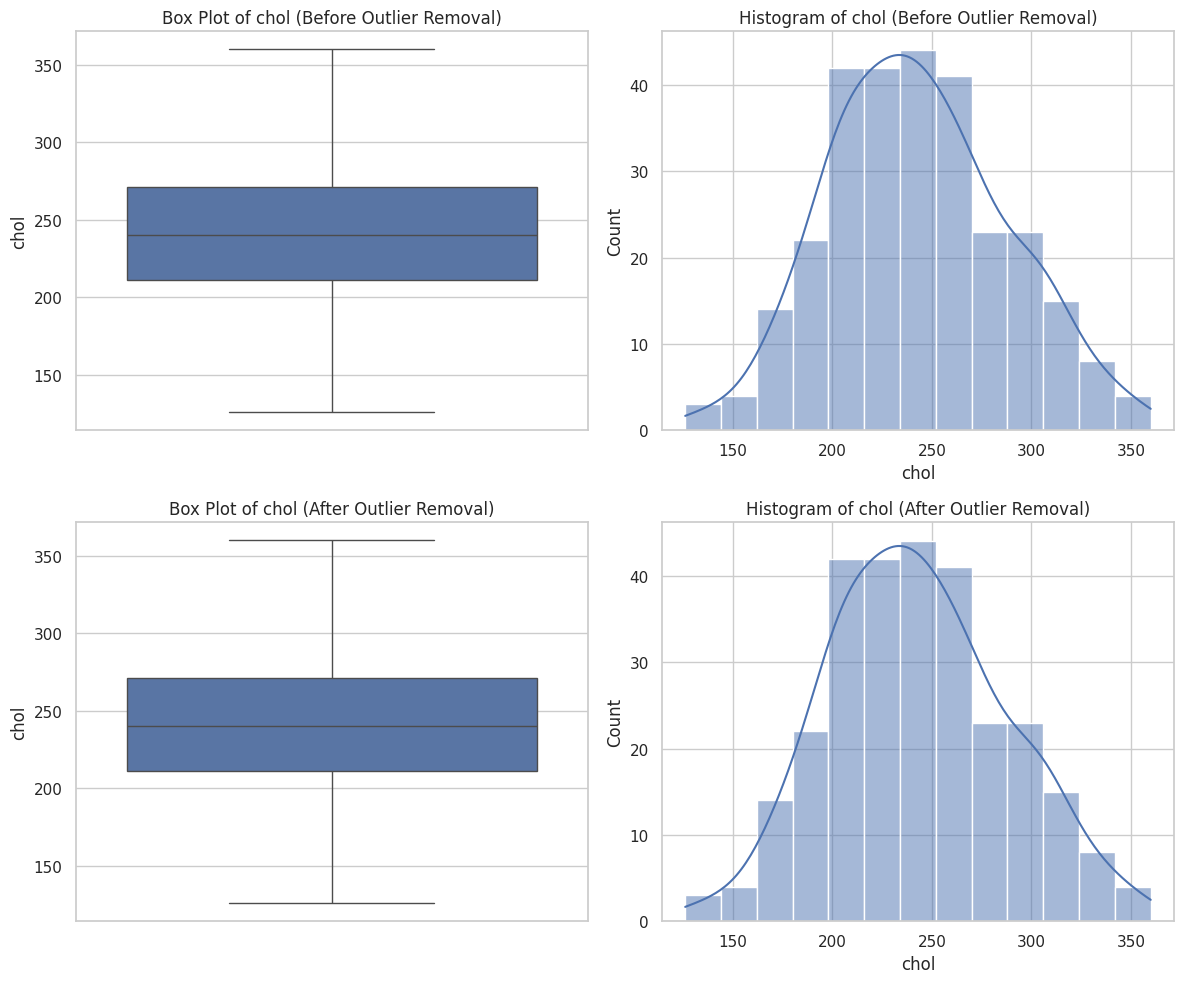

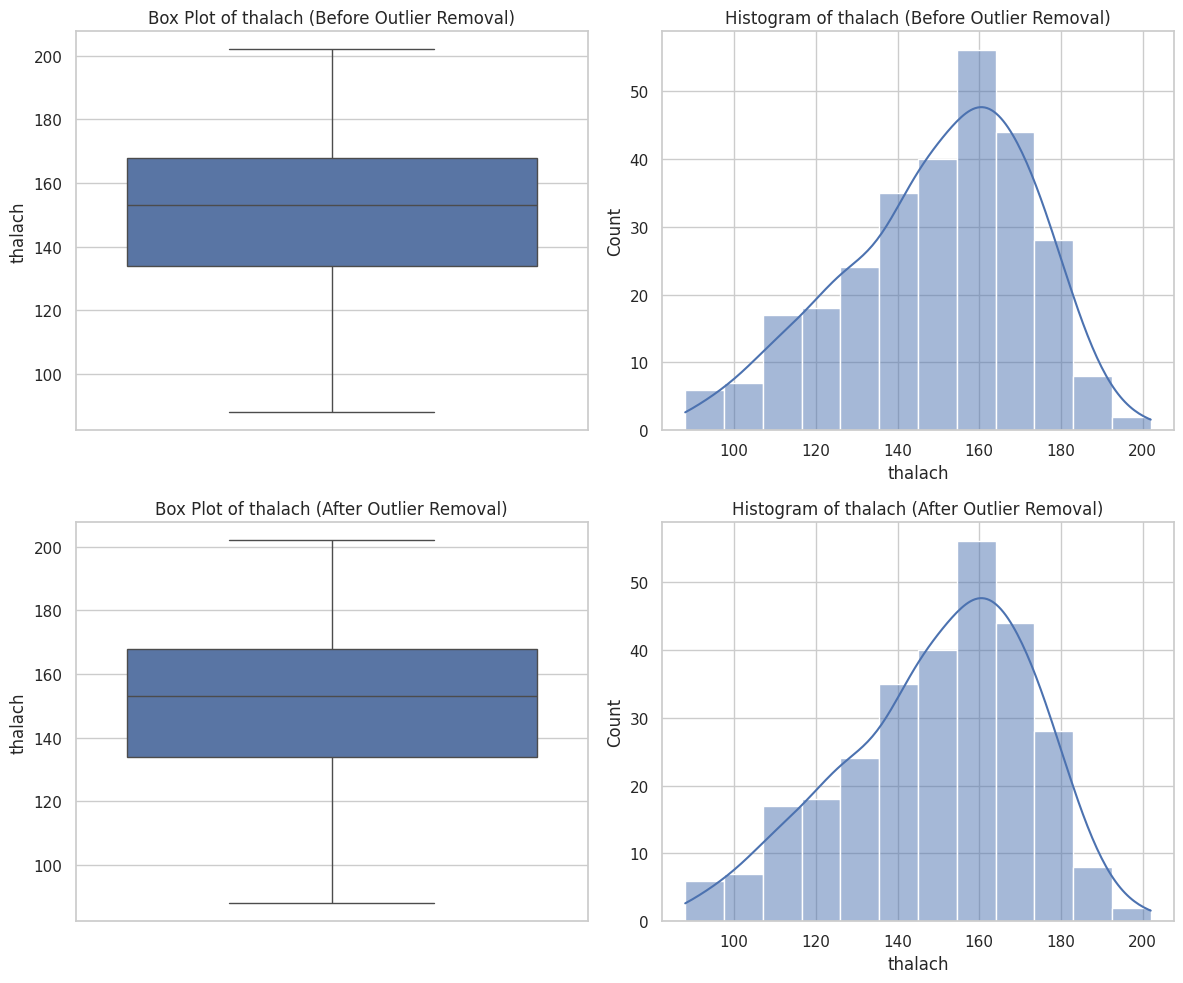

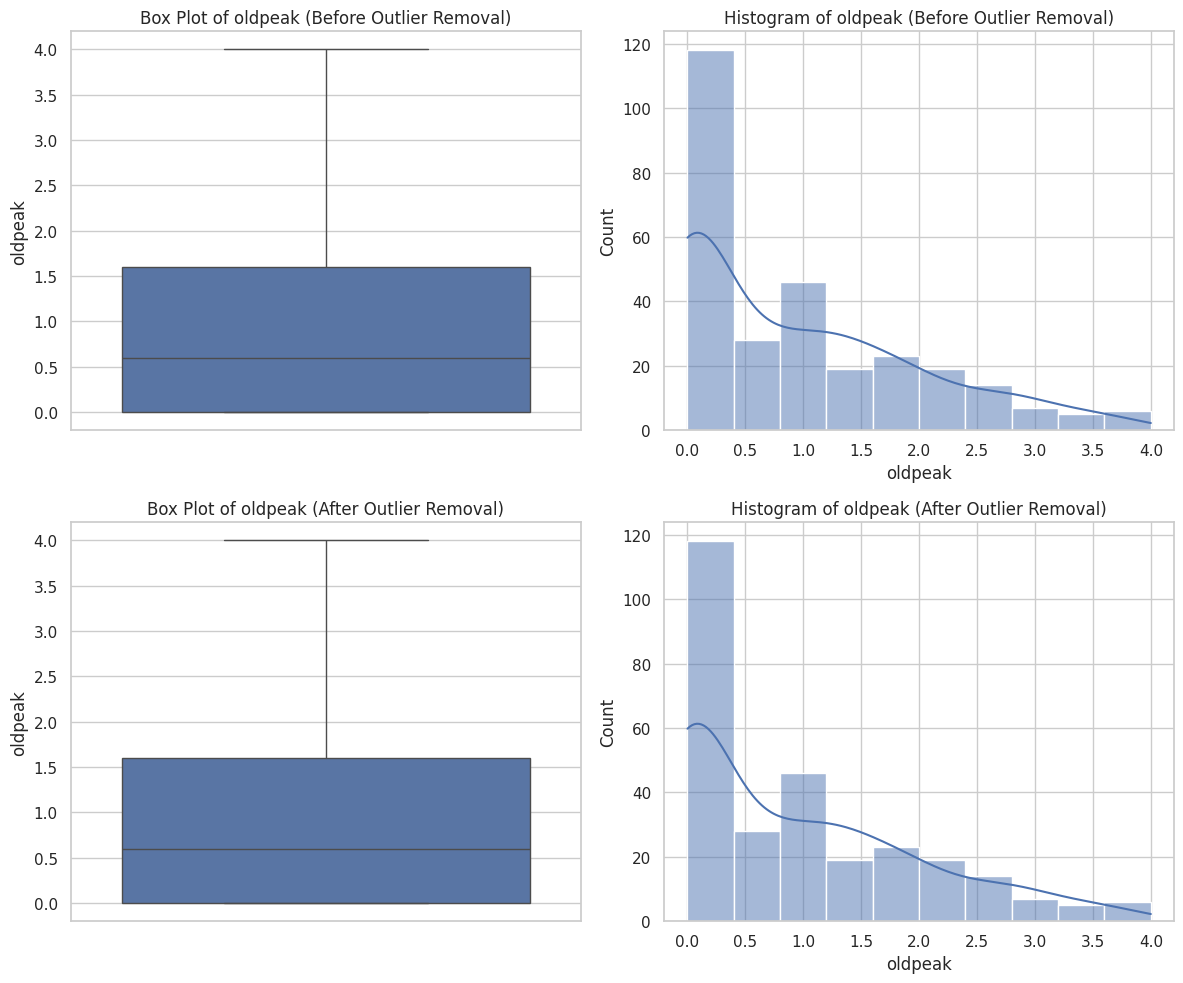

Shape of dataset after outlier removal: (285, 14)


In [40]:
# Function to plot box plots and histograms before and after outlier removal
def plot_outlier_removal(df, column):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Box plot before outlier removal
    sns.boxplot(y=df[column], ax=axes[0, 0])
    axes[0, 0].set_title(f'Box Plot of {column} (Before Outlier Removal)')

    # Histogram before outlier removal
    sns.histplot(df[column], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title(f'Histogram of {column} (Before Outlier Removal)')

    # Identify and remove outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Box plot after outlier removal
    sns.boxplot(y=df_no_outliers[column], ax=axes[1, 0])
    axes[1, 0].set_title(f'Box Plot of {column} (After Outlier Removal)')

    # Histogram after outlier removal
    sns.histplot(df_no_outliers[column], kde=True, ax=axes[1, 1])
    axes[1, 1].set_title(f'Histogram of {column} (After Outlier Removal)')

    plt.tight_layout()
    plt.show()

# Plot outlier removal for each column
outlier_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in outlier_columns:
    plot_outlier_removal(df, column)

# remove outliers from the original dataset
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Shape of dataset after outlier removal:", df.shape)

